In [57]:
import numpy as np
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import itertools
from copy import deepcopy as dcopy,copy
from skimage.morphology import label
from scipy.ndimage import measurements

In [58]:

url='https://www.janestreet.com/puzzles/knight-moves/'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
x =[text for text in soup.body.stripped_strings]

print(" ".join(x[7:11]))

A knight was alone on a chessboard.  He started on a square and marked it “1”, then moved to a square and marked it “2”, then moved to a square and marked it “3”, and so on, each time making legal knight’s moves, and never revisiting a square.   Some of the squares he visited are marked on the chessboard presented here. The knight stopped on his 28th square, at which point the 28 visited squares formed a picture with spiral symmetry (90 degree rotational symmetry). The numbers along the sides of the 8 rows and 8 columns are the sums of the numbers of the squares visited by the knight in that row/column. The answer to this month’s puzzle is the largest product of the numbers in any one row or column.


### Puzzle details
<img src="https://www.janestreet.com/puzzles/wp-content/uploads/2016/03/Mar16_puzzle.png" width="250">

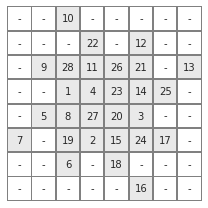

In [63]:
#Setup the constraints
# 28 filled cells so 7 in each quarter


bot_labels  = [7,14,72,66,102,90,42,13]
right_labels =[10,34,108,67,63,84,24,16]

solution = np.array([[0 ,0 ,10,0 ,0 ,0 ,0 ,0 ],
                     [0 ,0 ,0 ,22,0 ,12,0 ,0 ],
                     [0 ,9 ,28,11,26,21,0 ,13],
                     [0 ,0 ,1 ,4 ,23,14,25,0 ],
                     [0 ,5 ,8 ,27,20,3 ,0 ,0 ],
                     [7 ,0 ,19,2 ,15,24,17,0 ],
                     [0 ,0 ,6 ,0 ,18,0 ,0 ,0 ],
                     [0 ,0 ,0 ,0 ,0 ,16,0 ,0 ]
                    ])


#########################
# Code to print in a "nice" format
                            
def sol_print(solved):
    fig,ax = plt.subplots(1,1,figsize=(3,3))
    x = np.array((solved).astype('int').astype('str'))
    x[x=="0"] ="-"
    y = solved != 0
    ax = sns.heatmap(y,annot=x,cbar=False,cmap="Greys",fmt="",linewidths=1,center=3,linecolor="grey")
    ax.axis("off")
    plt.tight_layout()

sol_print(solution)

In [64]:
class Matrix():
    def __init__(self,fixed,bot_labels,right_labels):
        self.bot_labels = bot_labels
        self.right_labels = right_labels
        self.grid = fixed
        self.solution = []
        self.end_flag =0
     
     
    ##############################################
    # Get the products of the areas of the connected cells
    
    def product(self):
        prods =[]
        for i in range(8):
            row = self.grid[i,:]
            col = self.grid[:,i]
            row = row[row != 0]
            col = col[col != 0]
            prods.append(np.product(row))
            prods.append(np.product(col))
        return np.max(prods)
                         
    ###############################################
    # Main solver.
    
    def solve(self):
        return True
            
        

    
    

Max Product = 19,675,656

Solution took 0.0839 seconds



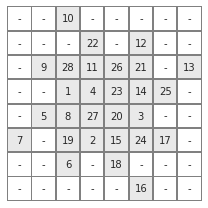

In [61]:
start = time.perf_counter()
test = Matrix(solution,bot_labels,right_labels)
sol_print(test.grid)
print("Max Product = {:,.0f}".format(test.product()))
stop =  time.perf_counter()
print('\nSolution took {:0.4f} seconds\n'.format((stop-start)))

In [62]:
url='https://www.janestreet.com/puzzles/solutions/march-2016-solution/'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
x =[text for text in soup.body.stripped_strings]

print(" ".join(x[7:11]))

The knight’s path is presented here, and the maximum product of the numbers in any row or column is 19,675,656 . Congrats to everyone who solved this month’s puzzle — we’ll be randomly picking a few submitters to receive Jane Street t-shirts!


### Puzzle solution
<img src="https://www.janestreet.com/puzzles/wp-content/uploads/2016/04/mar16_solution.png" width="350" height="400">